<a href="https://colab.research.google.com/github/KhaingLae/TensorFlow_DeepLearning_Bootcamp/blob/main/10_time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time series forecasting fundamentals with TensorFlow + Milestone Project 3 : BitPredict 💰 📈

Let's write some TensorFlow code to predict the price of Bitcoin based on the historical prices of bitcoin.

⚠ Note: This is not financial advice.

Links:


*   All resources: https://github.com/mrdbourke/tensorflow-deep-learning/
*   Book version of actual code/text: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/



## Get data

> 📖 Resource: To get the actual bitcoin historical data: go to the following link and then "Export data" and select "CSV".
https://www.coindesk.com/price/bitcoin

In [ ]:
# Download Bitcoin historical data from GitHub
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv


--2025-04-28 01:14:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2025-04-28 01:14:36 (6.90 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [ ]:
# Import with pandas
import pandas as pd
# Let's read in our bitcoin data and parse the data
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", parse_dates=["Date"], index_col=["Date"]) # parse the data column and tell pandas column 1 is a datetime
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
# How many samples do we have
len(df)

2787

We've collected the historical price of Bitcoin for the past 8 years but there's 2787 samples.

Typically deep learning models usually like lots and lots and lots of samples.

> 🔑 Note: the seasonality of a time series dataset is referred as the number of samples per year. So for our bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [ ]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


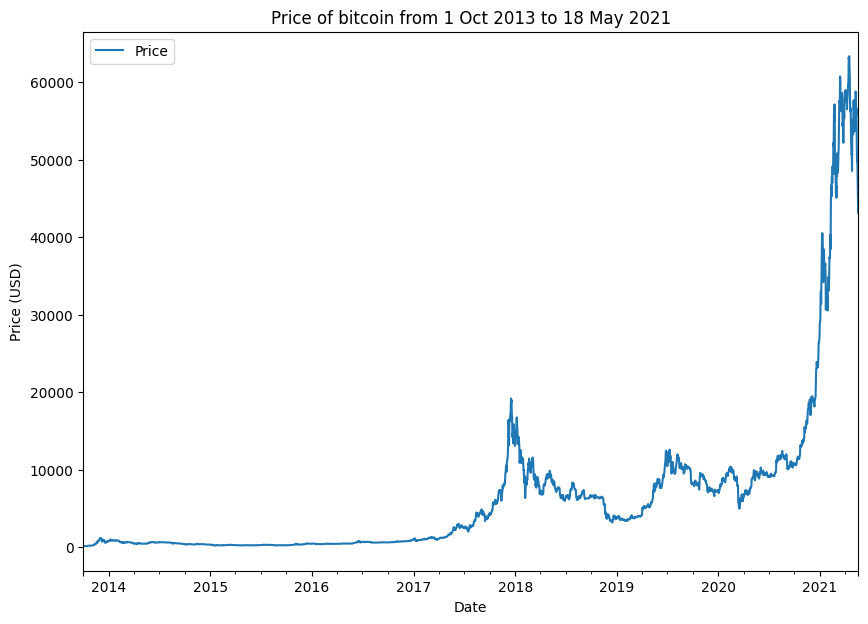

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7), title="Price of bitcoin from 1 Oct 2013 to 18 May 2021")
plt.ylabel("Price (USD)")
plt.show()

## Importing time series data with Python's CSV module

In [ ]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price =[]
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip header row
  for row in csv_reader:
    timesteps.append(datetime.strptime(row[1], "%Y-%m-%d")) # get the time
    btc_price.append(float(row[2])) # get the closing price

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

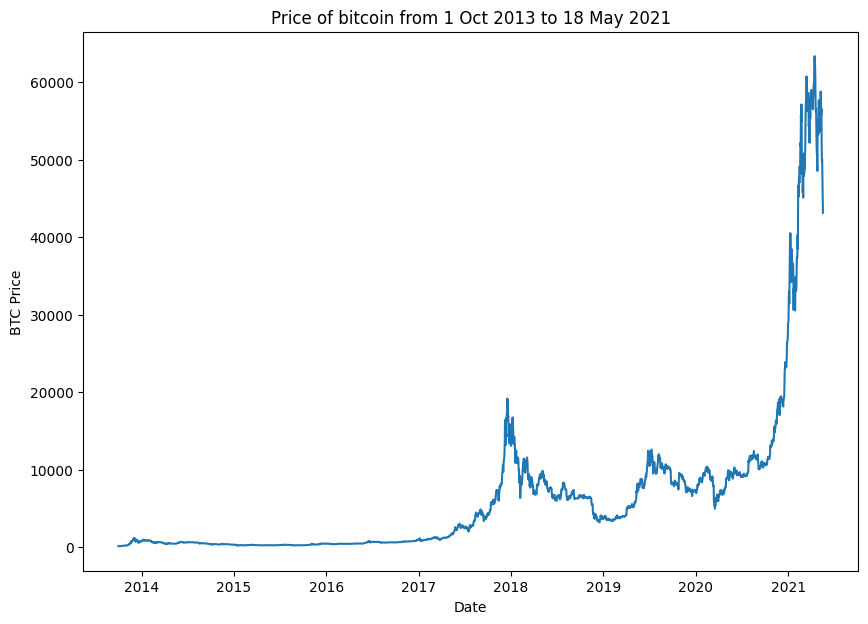

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.title("Price of bitcoin from 1 Oct 2013 to 18 May 2021")
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.show()

## Format data part 1: Create train and test sets of our time series data

In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()
timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

### Creating train and test set with time series data (the wrong way)

In [ ]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, prices, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

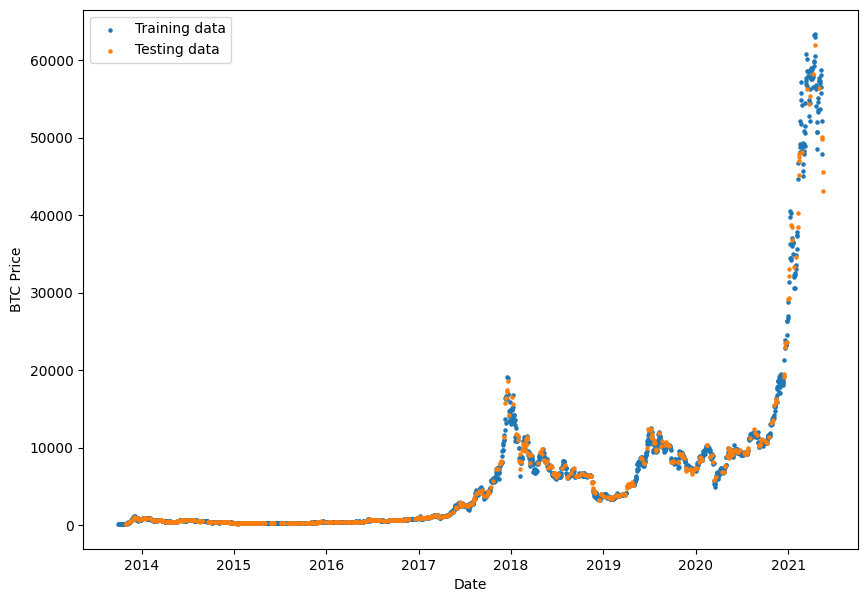

In [ ]:
# let's plot wrong train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Training data")
plt.scatter(X_test, y_test, s=5, label="Testing data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend()
plt.show()

### Create train & test set time series (the right way)

In [ ]:
# Create train and test splits  the right way for time series data
split_size = int(len(prices) * 0.8) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train),len(y_train), len(X_test), len(y_test)


(2229, 2229, 558, 558)

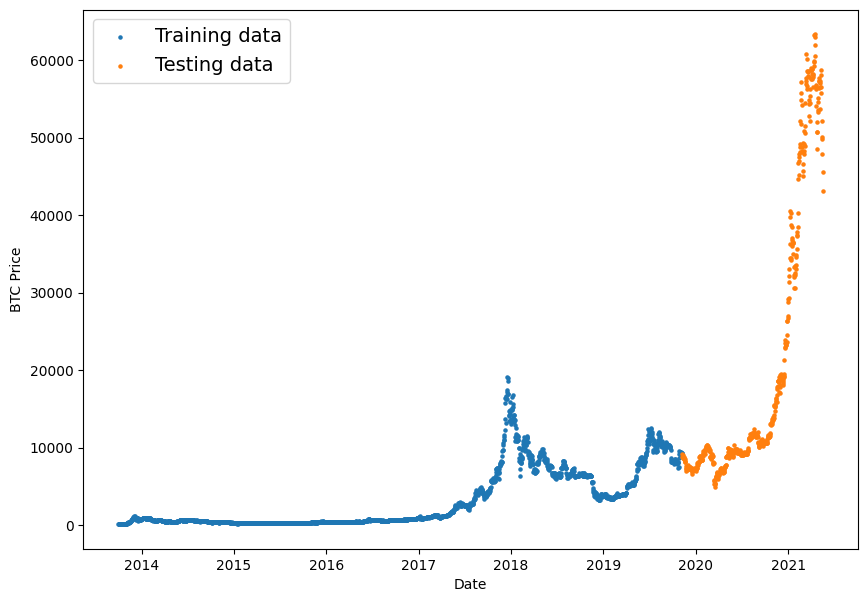

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Training data")
plt.scatter(X_test, y_test, s=5, label="Testing data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

## Create a plotting function

In [ ]:
# Create function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timesteps values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values
  """
  # Plot the series
  #plt.figure(figsize=(10,7))
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make labe bigger
  plt.grid(True)

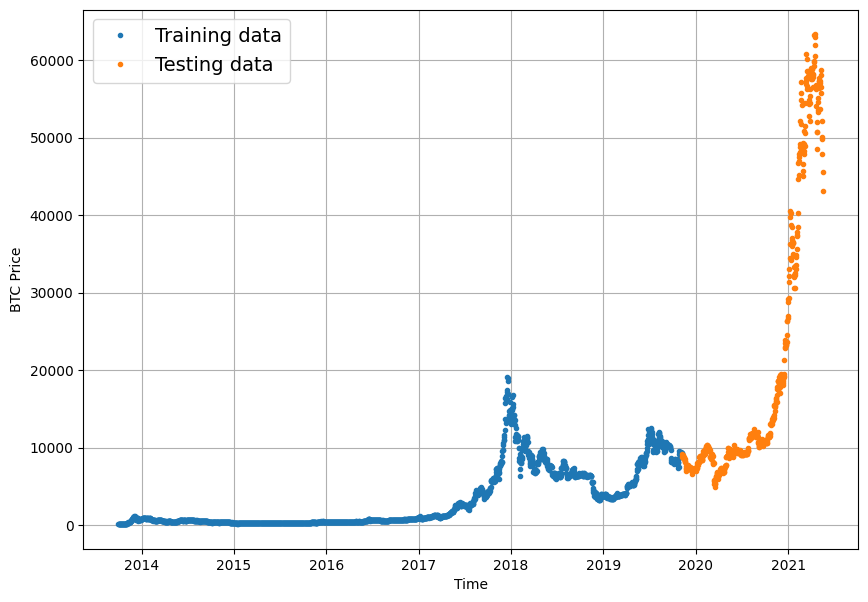

In [ ]:
# Test out plotting funcition
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Training data")
plot_time_series(timesteps=X_test, values=y_test, label="Testing data")

## Modelling Experiments

We've got some bitcoin historical data, to model it, let's run a series of modelling experiments and see which model is best.

Terms to be familiar with:
* **Horizon** = number of timesteps int the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict **horizon**

Modelling experiments we're running:
Model Number	Model Type	Horizon size	Window size	Extra data
* 0	Naïve model (baseline)
* 1	Dense model, horizon = 1, window =7
* 2	Same as 1, horizon = 1, window = 30
* 3	Same as 1, hoirzon = 7, window =	30
* 4	Conv1D
* 5	LSTM
* 6	Same as 1 (but with multivariate data)
* 7	N-BEATs Algorithm
* 8	Ensemble (multiple models optimized on different loss functions)
* 9	Future prediction model (model to predict future values)
* 10	Same as 1 (but with turkey 🦃 data introduced)

## Model 0: Naive forecast (baseline)

The formula look like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep)- this is for a horizon of 1.

In [ ]:
y_test[:10], y_test[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
        52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
        45604.61575361, 43144.47129086]))

In [ ]:
# Create a naive forcast
naive_forecast = y_test[:-1] # last value is for forecasting
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

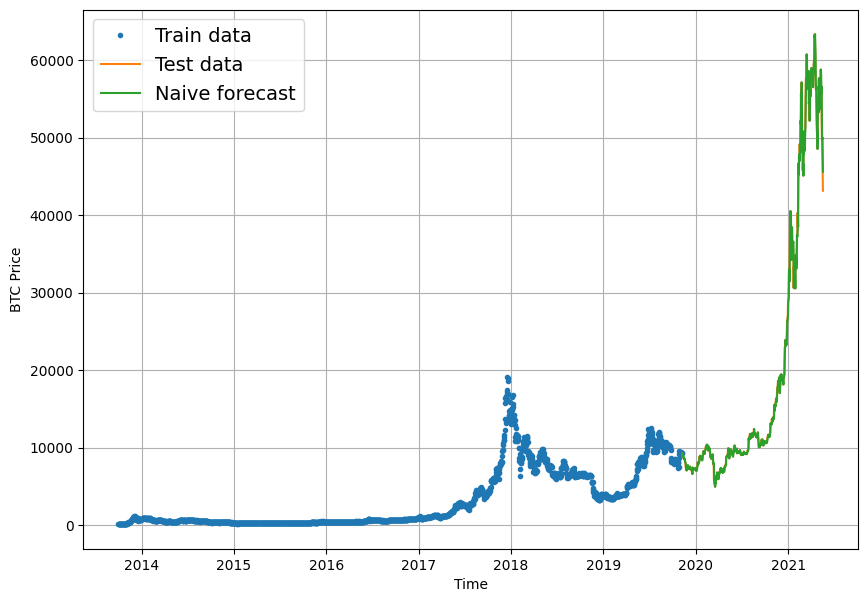

In [ ]:
# Plot naive  forecast
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values= y_test, format="-",label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast")

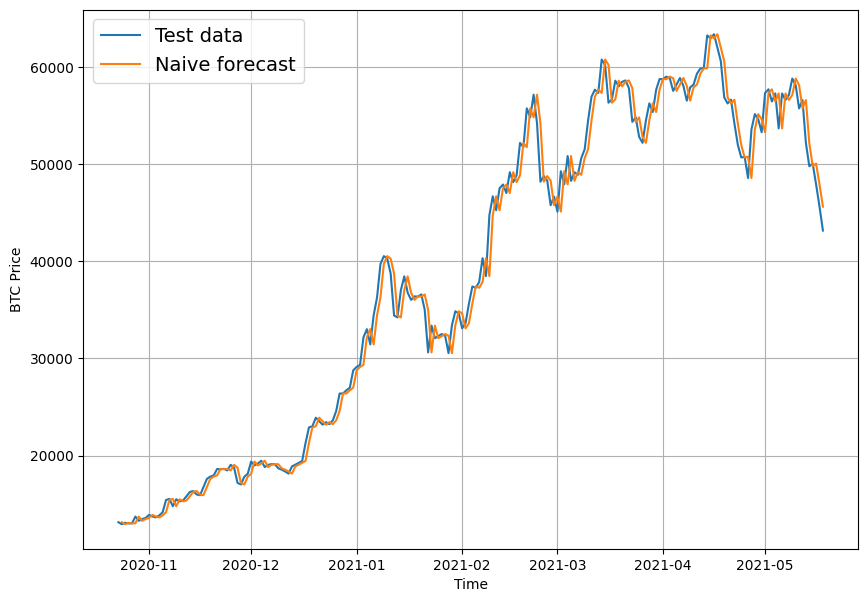

In [ ]:
# Plot naive  forecast
plt.figure(figsize=(10,7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values= y_test, start=350, format="-",label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive forecast")

> ⚒ **Exercise**: Spend 10 minutes reading the simple forecasts chapter of Forecasting: Principles in Practice. And have a search to find out why the naive forecast is hard to beat, does the term autoregressive come up?

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're prediction a number, so that we have a form of regression problem.

Becasue we're working on a regression problem, we'll nee some regression-like metrics.

A few common regression metrics (which can also be used in time series forecasting):

* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metris, **lower is better**, for example, an MAE of 0 that is better than an MAE of 100.

The main thing we're evaluating here is: **how do our model's forecasts(y_pred) compare against the actual values (y_true or ground_truth values)**?


In [ ]:
import tensorflow as tf

In [ ]:
# MASE implementation

def mean_absolute_scaled_error (y_true, y_pred):
  """
  Calculates the mean absolute scaled error for a forecast.

  Parameters
  ----------
  y_true : array of actual values
  y_pred : array of predicted values
  """
  # Calculate the absolute errors

  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Calculate the mean absolute error of the forecast (naive
  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  mae_naive_no_season = tf.cast(mae_naive_no_season, dtype=tf.float32)

  print(f'\n dtype of mae_naive_no_season: {mae_naive_no_season.dtype}')
  # our seasonality is 1 day (hence the shift of 1)
  return mae / mae_naive_no_season

In [ ]:
y_test[0].dtype

dtype('float64')

In [ ]:
# Create a function to tkae in model predictions and truth values and return evaluations

def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate a various evaluation metrics
  # mae = tf.keras.metrics.MeanAbsoluteError(y_true, y_pred)
  # mse = tf.keras.metrics.MeanSquaredError(y_true, y_pred)
  # rmse = tf.sqrt(mse)
  # mape = tf.keras.metrics.MeanAbsolutePercentageError(y_true, y_pred)
  # mase = mean_absolute_scaled_error(y_true, y_pred)
  mae = tf.keras.metrics.MeanAbsoluteError()(y_true, y_pred)
  mse = tf.keras.metrics.MeanSquaredError()(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.MeanAbsolutePercentageError()(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return { 'mae':mae.numpy(),
          'mse': mse.numpy(),
           'rmse': rmse.numpy(),
           'mape':mape.numpy(),
           'mase':mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results


 dtype of mae_naive_no_season: <dtype: 'float32'>


{'mae': np.float32(567.9802),
 'mse': np.float32(1147547.0),
 'rmse': np.float32(1071.2362),
 'mape': np.float32(2.516525),
 'mase': np.float32(0.99957)}

In [ ]:
tf.reduce_mean(y_test), tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>,
 <tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Other models you can use for baselines and for actual forecasts

In this book, we're foucused on TensorFlow and deep learning models.

However there are plenty of other styles of time series forecasting models you may want to experiment with:
https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts


## Format Data Part 2 : Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]


In [ ]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [ ]:
# Let's setup global variables for window and horizon size
WINDOW_SIZE = 7
HORIZON = 1

In [ ]:
# Create function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  input : [0,1,2,3,4,5,6,7] -> output : ([0,1,2,3,4,5,6],[7])
  """
  return x[:, :-horizon], x[:, -horizon]

In [ ]:
# Test our the window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window)} -> Label: {tf.squeeze(test_label)}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, for large time series,  that' be quite slow.

To speed things up, we'll leverage Numpy array indexing.

Our function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy Indexing to create a 2D array of mulitple window steps, for example:
```
[0, 1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 7]
[2, 3, 4, 5, 6, 7, 8]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)

4. Uses our `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon.

> 📖 Resources: The function we're about to create has been adapted from the following article:
https://medium.com/data-science/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5


In [ ]:
import numpy as np


In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon= HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size.
  """
  # 1. Create a window of a specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

  # 2. Create a 2D array of multiple windowed steps (minus 1 to account for 1 indexing)
  windowed_indexes = window_step + np.expand_dims(np.arange(len(x)- (window_size + horizon - 1)), axis=0).T

  # print(f"Windowed indexes:\n {windowed_indexes, windowed_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple wind steps
  windowed_array = x[windowed_indexes]
  # print(f"Windowed array:\n {windowed_array, windowed_array.shape}")

  # 4. Get the labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: 123.033
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: 124.049
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: 125.96116


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[-i-3]} -> Label: {full_labels[-i-3]}")


Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: 47885.6252547166
Window: [57107.12067189 58788.20967893 58102.19142623 55715.54665129
 56573.5554719  52147.82118698 49764.1320816 ] -> Label: 50032.6931367648
Window: [56583.84987917 57107.12067189 58788.20967893 58102.19142623
 55715.54665129 56573.5554719  52147.82118698] -> Label: 49764.1320815975


> 🔑 **Note**: You can find a function which achieves similar results to the ones we implemented above at tf.keras.preprocessing.timeseries_dataset_from_array() https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/timeseries_dataset_from_array. Just like ours, it takes in an array and returns a windowed dataset. It has the benefit of returning data in the form of a tf.data.Dataset instance (we'll see how to do this with our own data later).

## Turning Windows into training and test sets

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows,  train_labels, test_labels

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels= make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
len(full_windows)*0.8

2224.0

In [ ]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])
# Tutorial gets true

True

## Make a modelling checkpoint

Because our model's performance will fluctuate from experimemnt to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performance against the other model's best performances.

For example, if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create a modelling checkpoint callback using the following:
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

## Model 1: Dense Model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs

Why these values?

I picked them out of experimentation.
* **Hyperparameters** = values a machine learning practitioner can adjust themselves
* **Parameters** = values a model learns on its own

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct the model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="linear") # linear activation is the same as no activation
], name="model_1_dense.keras")

# 2. Compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
history_1 = model_1.fit(train_windows,
                        train_labels,
                        epochs=100,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 3502.0654 - mae: 3502.0654 - mse: 30480470.0000 - val_loss: 7108.4688 - val_mae: 7108.4688 - val_mse: 91396992.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 649.5452 - mae: 649.5452 - mse: 1420573.5000 - val_loss: 1411.2415 - val_mae: 1411.2415 - val_mse: 6170686.5000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 240.9822 - mae: 240.9822 - mse: 253655.5156 - val_loss: 1213.7437 - val_mae: 1213.7437 - val_mse: 4807016.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 209.2867 - mae: 209.2867 - mse: 204638.2969 - val_loss: 1108.0225 - val_mae: 1108.0225 - val_mse: 4056712.7500
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 191.7471 - mae: 191.7471 - mse: 189755.4531 - val_loss: 1102.8031 - val_mae: 1102.8031 - val_mse: 3930420.5000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 187.1107 - mae: 187.1107 - mse: 183503.6875 - val_loss: 1101.6274 - val_mae: 1101.62

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 283.1560 - mae: 283.1560 - mse: 343811.6562


[566.1184692382812, 566.1184692382812, 1160937.625]

In [ ]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense.keras")
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 282.1249 - mae: 282.1249 - mse: 344091.5312


[564.8429565429688, 564.8429565429688, 1156787.875]

## Making forecasts with a model (on the test dataset)

To make "forecastss" on the test dataset (note: these won't be actual forecasts, they're only pseudo forecasts because actual forecastss are into the future), let's write a function to:

1. Train in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model `predict()` method
4. Returns the predictions

In [ ]:
def make_preds(model, input_data):
  """
  Use mode to make predictions input data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8829.243, 8770.983, 9025.155, 8774.297, 8723.428, 8709.549,
        8667.957, 8516.556, 8429.22 , 8519.702], dtype=float32)>)

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=test_labels, y_pred=model_1_preds)
model_1_results


 dtype of mae_naive_no_season: <dtype: 'float32'>


{'mae': np.float32(564.843),
 'mse': np.float32(1156788.1),
 'rmse': np.float32(1075.5409),
 'mape': np.float32(2.5356479),
 'mase': np.float32(0.99227273)}

In [ ]:
naive_results

{'mae': np.float32(567.9802),
 'mse': np.float32(1147547.0),
 'rmse': np.float32(1071.2362),
 'mape': np.float32(2.516525),
 'mase': np.float32(0.99957)}

In [ ]:
test_labels.size

556

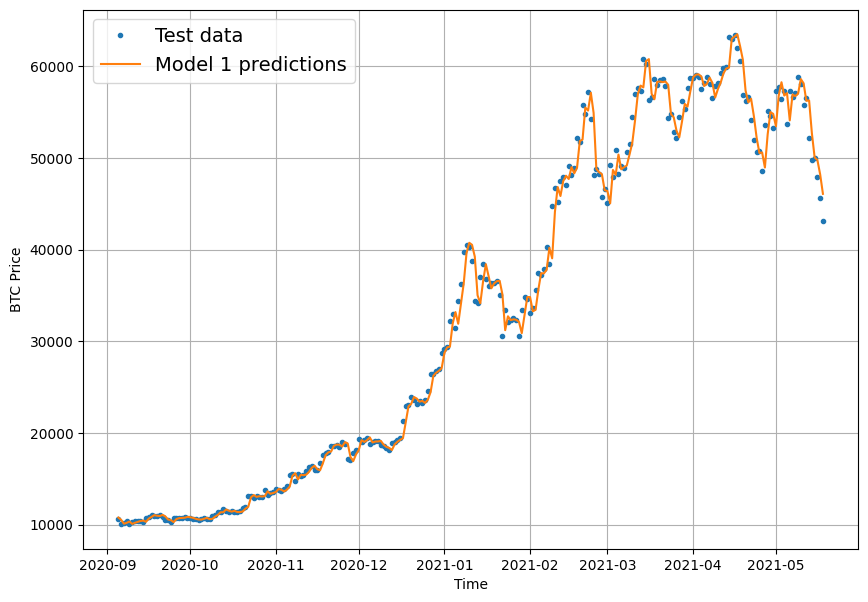

In [ ]:
# Let's plot our model 1 predictions
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:],
                 start=offset,
                 label="Test data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds[:],
                 start=offset,
                 format='-',
                 label="Model 1 predictions")

## Model 2: Dense (window= 30, horizon=1)

In [ ]:
WINDOW_SIZE=30
HORIZON=1

In [ ]:
# Make window data with appropiate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
# Make train and test windows
train_windows, test_windows, train_labels, test_labels= make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct the model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON) # linear activation is the same as no activation so I will remove linear activation for test
], name="model_2_dense.keras")

# 2. Compile the model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 3. Fit the model
history_2 = model_2.fit(train_windows,
                        train_labels,
                        epochs=100,
                        batch_size=128,
                        verbose=0,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 385.9468


714.6739501953125

In [ ]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense.keras")
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 328.3970


618.9904174804688

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2, input_data=test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
model_2_preds.shape, test_labels.shape

(TensorShape([552]), (552,))

In [ ]:
model_2_results = evaluate_preds(y_true=test_labels, y_pred=model_2_preds)
model_2_results
#


 dtype of mae_naive_no_season: <dtype: 'float32'>


{'mae': np.float32(618.99036),
 'mse': np.float32(1290281.8),
 'rmse': np.float32(1135.9056),
 'mape': np.float32(2.9195862),
 'mase': np.float32(1.0820012)}

In [ ]:
model_1_results

{'mae': np.float32(564.843),
 'mse': np.float32(1156788.1),
 'rmse': np.float32(1075.5409),
 'mape': np.float32(2.5356479),
 'mase': np.float32(0.99227273)}

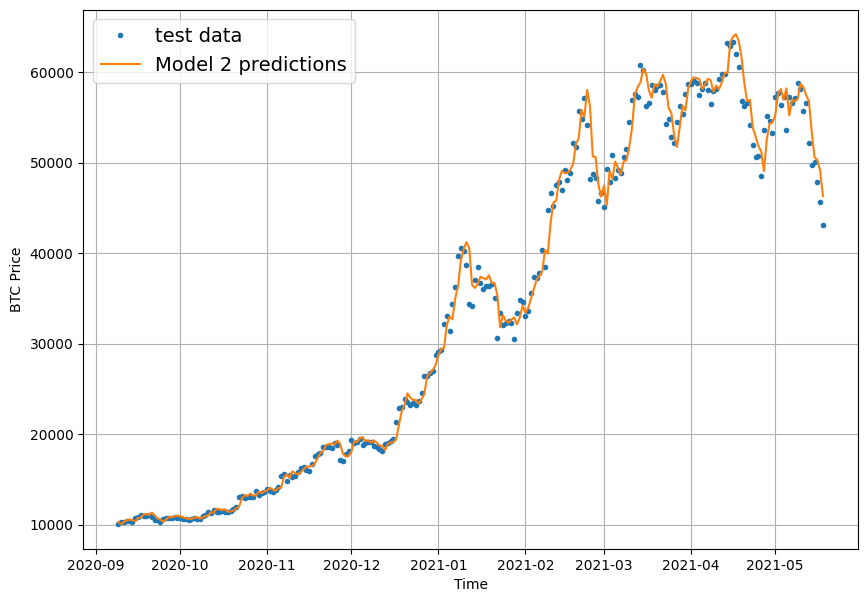

In [ ]:
offset =300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:],
                 start=offset,
                 label="test data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_2_preds[:],
                 start=offset,
                 format='-',
                 label="Model 2 predictions")
#

## Model 3: Dense (window=30, horizon= 7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels= make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
train_windows.shape, test_windows.shape, train_labels.shape, test_labels.shape

((2200, 30), (551, 30), (2200,), (551,))

In [ ]:
from ast import mod
tf.random.set_seed(42)

# Create model (same as model 2 but different input and output )
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense.keras")

model_3.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

# Reshape train_labels and test_labels to have shape (num_samples, HORIZON)
train_labels = train_labels.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

history_3 = model_3.fit(train_windows,
                        train_labels,
                        epochs=100,
                        batch_size=128,
                        verbose=0,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 327.1352


631.4842529296875

In [ ]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense.keras")
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 327.1352


631.4842529296875

In [ ]:
model_3_preds = make_preds(model_3, test_windows)
model_3_preds[:3]

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[9249.7295, 9119.594 , 9268.713 , 9133.591 , 9169.185 , 9238.354 ,
        9077.35  ],
       [8966.067 , 8835.729 , 9011.454 , 8847.778 , 8857.03  , 8782.617 ,
        8858.512 ],
       [8730.845 , 8751.982 , 8875.528 , 8705.094 , 8658.248 , 8763.232 ,
        8712.912 ]], dtype=float32)>

In [ ]:
model_3_results = evaluate_preds(y_true=test_labels, y_pred=model_3_preds)
model_3_results


 dtype of mae_naive_no_season: <dtype: 'float32'>


{'mae': np.float32(631.48425),
 'mse': np.float32(1321506.9),
 'rmse': np.float32(1149.5681),
 'mape': np.float32(2.946239),
 'mase': np.float32(1.1501812)}

In [ ]:
model_3_preds.shape, model_2_preds.shape

(TensorShape([551, 7]), TensorShape([552]))

In [ ]:
model_2_results

{'mae': np.float32(618.99036),
 'mse': np.float32(1290281.8),
 'rmse': np.float32(1135.9056),
 'mape': np.float32(2.9195862),
 'mase': np.float32(1.0820012)}

### Make our evaluation function work for larger horizons

In [ ]:
model_3_results['mae'].ndim, model_2_results['mae'].ndim

(0, 0)

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate a various evaluation metrics
  # mae = tf.keras.metrics.MeanAbsoluteError(y_true, y_pred)
  # mse = tf.keras.metrics.MeanSquaredError(y_true, y_pred)
  # rmse = tf.sqrt(mse)
  # mape = tf.keras.metrics.MeanAbsolutePercentageError(y_true, y_pred)
  # mase = mean_absolute_scaled_error(y_true, y_pred)
  mae = tf.keras.metrics.MeanAbsoluteError()(y_true, y_pred)
  mse = tf.keras.metrics.MeanSquaredError()(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.MeanAbsolutePercentageError()(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # I don't need this because I have ndim value '0' already
  # Account for different sized metrics (for longer horizons, reduce to single number)
  # if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
   # mae = tf.reduce_mean(mae)
   # mse = tf.reduce_mean(mse)
   # rmse = tf.reduce_mean(rmse)
   # mape = tf.reduce_mean(mape)
   # mase = tf.reduce_mean(mase)

  return { 'mae':mae.numpy(),
          'mse': mse.numpy(),
           'rmse': rmse.numpy(),
           'mape':mape.numpy(),
           'mase':mase.numpy()}

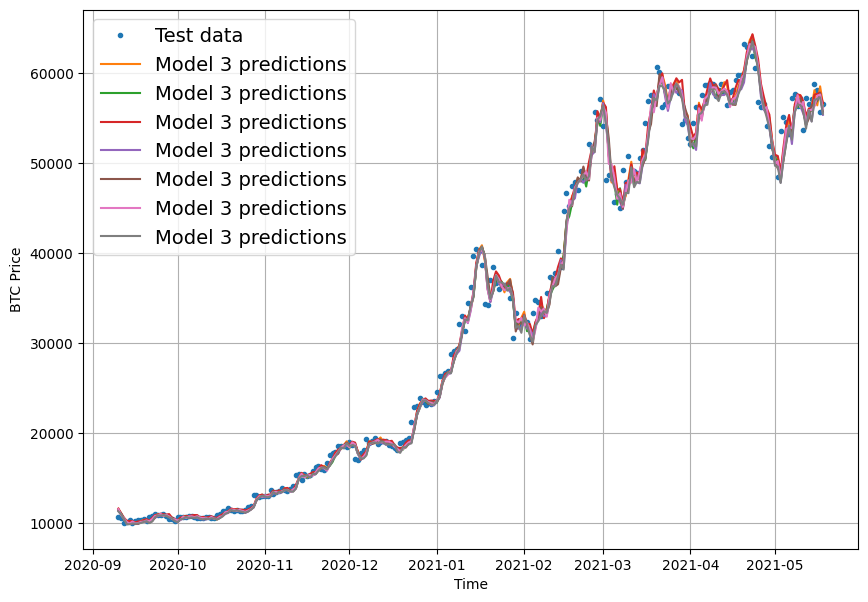

In [ ]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 # values=test_labels[:],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 # values=model_3_preds[:],
                 values = model_3_preds,
                 start=offset,
                 format='-',
                 label="Model 3 predictions")

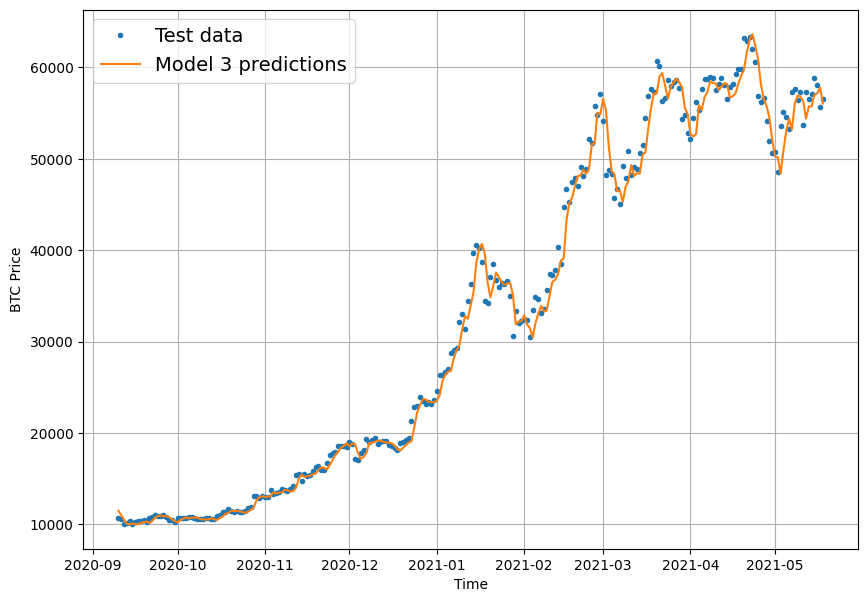

In [ ]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 # values=test_labels[:],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 # values=model_3_preds[:],
                 values = tf.reduce_mean(model_3_preds, axis=1),
                 start=offset,
                 format='-',
                 label="Model 3 predictions")

## Which of the models is performing the best so far?


<Axes: >

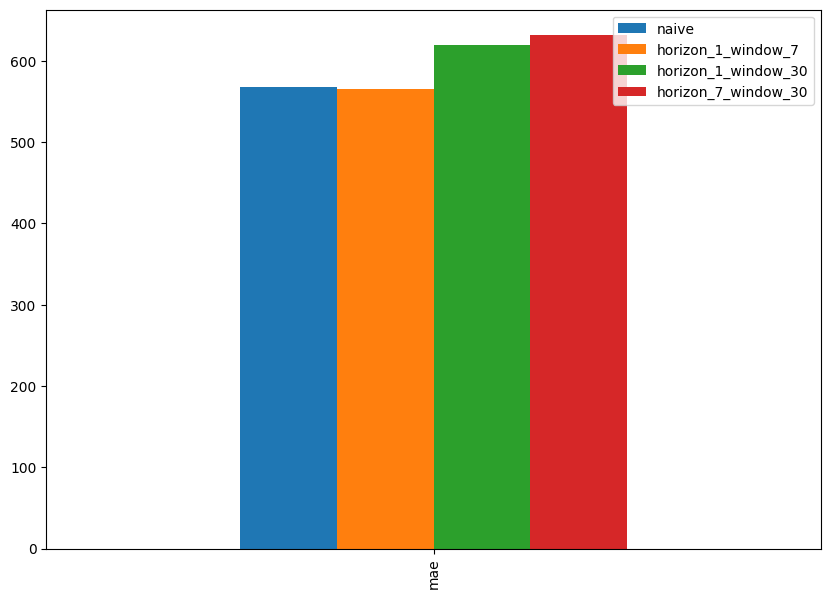

In [ ]:
pd.DataFrame({"naive": naive_results['mae'],
             "horizon_1_window_7":model_1_results["mae"],
             "horizon_1_window_30":model_2_results["mae"],
             "horizon_7_window_30":model_3_results["mae"],
             },index=["mae"]).plot(figsize=(10,7), kind="bar")

> 🔑 **Note**: You might be wondering, why are the naïve results so good? One of the reasons could be due the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at t+1 (the next timestep) is typically close to the value at t (the current timestep). In other words, today's value is probably pretty close to yesterday's value. Of course, this isn't always the case but when it is, a naïve model will often get fairly good results.

> 📖 **Resource**: For more on how autocorrelation influences a model's predictions, see the article How (not) to use Machine Learning for time series forecasting: Avoiding the pitfalls by Vegard Flovik

## Model 4: Conv1D

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels= make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

To use Conv1D layer, we need an input shape of : `(batch_size, timesteps, input_dim)`..

However our data isn't in that shape yet...

In [ ]:
# Check data input shaped
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works...
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dim_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [ ]:
# Test our lambda layer
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dim_layer(x).shape}")
print(f"Original values with expanded shape: {expand_dim_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape: [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
tf.random.set_seed(42)

import tensorflow as tf
# Create Conv1D model
model_4 = tf.keras.Sequential([
    # expand_dim_layer,
    # layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.Reshape([1, -1]),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name='model_4_conv1d.keras')

# Compile the model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
history_4 = model_4.fit(train_windows, train_labels, batch_size=128, epochs=100, verbose=0, validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4.summary()

Model: "model_4_conv1d.keras"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 1, 7)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 1, 128)         │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1, 1)           │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

In [ ]:
# Evaluate the model
model_4.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9572.5146


17074.337890625

In [ ]:
# this `Lambda` layer is a Python lambda. Deserializing it is unsafe. If you trust the source of the config artifact, you can override this error by passing `safe_mode=False` to `from_config()`, or calling `keras.config.enable_unsafe_deserialization().

model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1d.keras")

model_4.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9549.0918


17004.935546875

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1386.0399, 1336.0685, 1356.392 , 1357.6066, 1352.1937, 1356.8636,
       1337.0586, 1307.4103, 1312.0554, 1300.5979], dtype=float32)>

In [ ]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_4_preds)
model_4_results


 dtype of mae_naive_no_season: <dtype: 'float32'>


{'mae': np.float32(17004.936),
 'mse': np.float32(509180700.0),
 'rmse': np.float32(22565.033),
 'mape': np.float32(84.59907),
 'mase': np.float32(29.872961)}

## Model 5: RNN (LSTM)

Let's build an RNN model for our time series data.

We'll use the same data we created previously.

In [ ]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE, 1))
x = layers.LSTM(128, activation="relu")(inputs)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_lstm.keras")

# Compile
model_5.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data =(test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - loss: 2228.3811 - val_loss: 1293.5253
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 218.3716 - val_loss: 1027.0205
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 166.4061 - val_loss: 1159.0100
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 249.1553 - val_loss: 1477.4694
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 233.6241 - val_loss: 3178.0583
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 353.2605 - val_loss: 1089.7437
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 173.0623 - val_loss: 1455.3071
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 220.8697 - val_loss: 972.4909
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 186.8828 - val_loss: 1117.0833
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 179.9466 - val_loss: 1043.3826
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 189.4976 - val_loss: 1380.8912
Epoch

In [ ]:
# Loaded in best version of model_5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm.keras")
model_5.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 346.3987


681.775390625

In [ ]:
# Make prediction with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([9160.041, 8940.896, 8952.299, 8937.588, 8864.684], dtype=float32)>

In [ ]:
# Evaluate model 5
model_5_results = evaluate_preds(y_true=test_labels, y_pred=model_5_preds)
model_5_results


 dtype of mae_naive_no_season: <dtype: 'float32'>


{'mae': np.float32(681.7753),
 'mse': np.float32(1599950.2),
 'rmse': np.float32(1264.8914),
 'mape': np.float32(3.0993807),
 'mase': np.float32(1.1976904)}

## Make a multivariant time series dataset

Before we add feature to our time series, what is a feature we can use?

One feature we could add is whether or not Daniel Bourke tweeted on that day..

* day 1 - 0
* day 2 - 1
* day 3 - 0

What's the better feature for bitcoin?

How about the bitcoin halving events?

In [ ]:
# Let's make a multivariant time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Let's add the bitcoins having events to our dataset
block_reward_1 = 50  # 3 January 2009 - this block reward isn't in our dataset (our data  starts from 01 October 2009)
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None
bitcoin_prices_block.head()

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block.head(), bitcoin_prices_block.tail()

(                Price block_reward
 Date                              
 2013-10-01  123.65499           25
 2013-10-02  125.45500           25
 2013-10-03  108.58483           25
 2013-10-04  118.67466           25
 2013-10-05  121.33866           25,
                    Price block_reward
 Date                                 
 2021-05-14  49764.132082         6.25
 2021-05-15  50032.693137         6.25
 2021-05-16  47885.625255         6.25
 2021-05-17  45604.615754         6.25
 2021-05-18  43144.471291         6.25)

<Axes: xlabel='Date'>

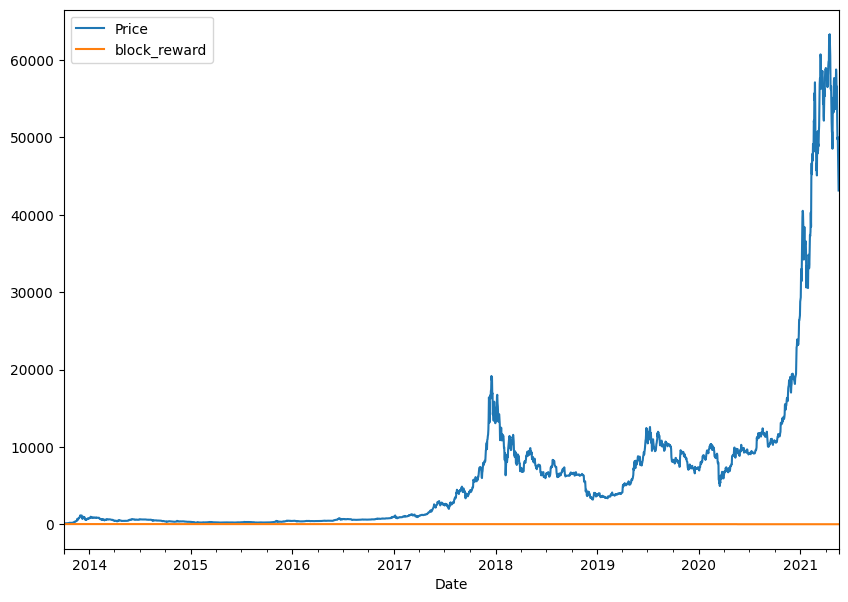

In [ ]:
bitcoin_prices_block.plot(figsize=(10,7))
#

<Axes: xlabel='Date'>

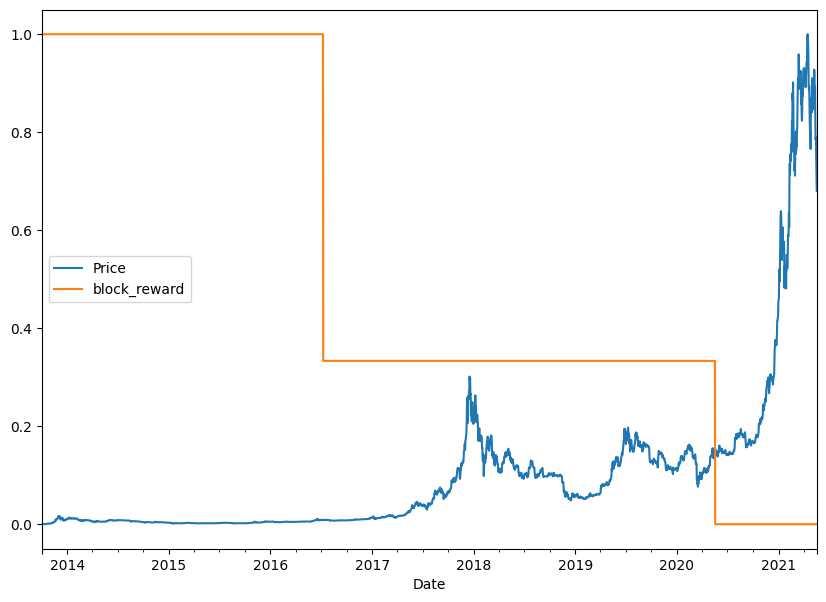

In [ ]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), columns= bitcoin_prices_block.columns, index= bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7))

## Making a windowed dataset with pandas

Previously we've turned our nivariate time series into windowed dataset using the helper functions above.

However, since we've got multivariante data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data

In [ ]:
## Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of Bitcoin historical data with block reward feature
bitcon_prices_windowed = bitcoin_prices_block.copy()

# Add windowed cloumns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcon_prices_windowed[f"Price+{i+1}"] = bitcon_prices_windowed["Price"].shift(periods=i+1)
bitcon_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we've done is create a way to window our dataset directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [ ]:
# Create X (windows) and y (horizons) features
X = bitcon_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcon_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

,Price
Date,
2013-10-08,123.032997
2013-10-09,124.049004
2013-10-10,125.961159
2013-10-11,125.279663
2013-10-12,125.927498


In [ ]:
# Make train and test sets using indexing
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate time series)

In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
                 layers.Dense(HORIZON)
], name="model_6_dense_multivariate.keras")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 4056.3318 - val_loss: 7109.2778
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 653.1951 - val_loss: 1391.0344
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 251.8284 - val_loss: 1277.2975
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 221.5523 - val_loss: 1161.7316
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 199.3551 - val_loss: 1122.9535
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 189.4650 - val_loss: 1107.0773
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 182.6817 - val_loss: 1063.1814
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 174.8019 - val_loss: 1015.6915
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 169.4592 - val_loss: 1007.6409
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 164.2042 - val_loss: 948.0598
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 159.3797 - val_loss: 926.0206
Epoch 12

In [ ]:
# Evaluate multivariant model
model_6.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 285.7589


570.2318725585938

In [ ]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate.keras")
model_6.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 284.6865


569.2994384765625

In [ ]:
# Make predictions with multivariant model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8858.736, 8790.442, 9041.009, 8787.25 , 8721.972], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_true=y_test, y_pred=model_6_preds)
model_6_results


 dtype of mae_naive_no_season: <dtype: 'float32'>


{'mae': np.float32(569.2994),
 'mse': np.float32(1167729.2),
 'rmse': np.float32(1080.6152),
 'mape': np.float32(2.5508363),
 'mase': np.float32(1.0001013)}

In [ ]:
model_1_results

{'mae': np.float32(564.843),
 'mse': np.float32(1156788.1),
 'rmse': np.float32(1075.5409),
 'mape': np.float32(2.5356479),
 'mase': np.float32(0.99227273)}

> 📖 Resource: For different ideas on how to improve a neural network model (from a model perspective), refer to the Improving a model section in notebook 02.https://dev.mrdbourke.com/tensorflow-deep-learning/02_neural_network_classification_in_tensorflow/#improving-a-model

## Model 7: N-BEATS algorithm

Let's now try build the biggest baddest (though maybe not the baddest, as in, it performs really well..) time series forecasting model we've built so far.

More specifically, we're going to be replicating the algorithm in Figure 1 from the following paper: https://arxiv.org/pdf/1905.10437

Why?

* This will allow us to practice replicating a paper with TensorFlow code
* We will see how to use TensorFlow layer subclassing (to make our own custom layers)
* Get experience using the Functional API to create a custom architecture
* Potentially get state of art results

### Building and testing the N-BEATS block layer

Because the N-BEATS block layer doesn't exist in TensorFlow, we've got to create it.

To create custom layers and models in TensorFlow we can use subclassing:
https://www.tensorflow.org/guide/keras/making_new_layers_and_models_via_subclassing


In [ ]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activationn
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theata layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x= inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Let's test our NBeatsBlock class using dumming inputs and outputs.

In [ ]:
# Setup dummy NBeatsBlock layer to inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size = WINDOW_SIZE+ HORIZON, # backcast + forecast
                                       n_neurons=128,
                                       n_layers=4,
                                       horizon=HORIZON)


In [ ]:
# Create dummy inputs ( have to same size as input size)
dummy_inputs = tf.expand_dims(tf.range(1, WINDOW_SIZE+1), axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# There are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.10202238 -0.5846362   0.3385058   0.10121244 -0.69323385  0.53057456
  0.6897672 ]
Forecast: 0.6902549266815186


### Preparing data for the N-BEATS algorithm using `tf.data`

To make our input data load as fast as possible we're going to be adhering to the performant data pipelines steps in the tf.data guide:
https://www.tensorflow.org/guide/data_performance

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create NBEATs data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head(10)


,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Time to make our dataset performance using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

The N-BEATS algorith has a fair few number of parameters, many of them can be found in Table 18: https://arxiv.org/abs/1905.10437

In [ ]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THITA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THITA_SIZE

(7, 8)

### Getting ready for residual connections

Before we can craft our N-BEATS model, we need two layers for the residual connections(subtract and add).

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-BEATS paper).

For more residual connections see: https://en.wikipedia.org/wiki/Residual_neural_network

And here: https://paperswithcode.com/method/resnet

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compilling and fitting the N-BEATS algorith

1. Setup an instance of the N-BEATS block layer using `N-BEATSBlock`(this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API).
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use for loop to create stacks of block layers
5. Use the `NBeatsBlock` class  to within the for loop in (4) to create blocks which returns blackcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper use multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default setting as per section 5.2 of N-BEATS paper
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
  * Early Stopping - because the model willbe training for so long, we'll stop it early if it stops improving
  * Reduce LR on Plateau - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time (take smaller steps towards best performance)


In [ ]:
%%time
tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THITA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to the stacks
stack_input = layers.Input(shape=(INPUT_SIZE,), name="stack_input")

# 3. Make initial backcast and forecast (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS - 1)): # first stack is alredy created in 3.
  # 5. Use the NBeatsBlock to calculate the blackcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                            theta_size=THITA_SIZE,
                                        horizon=HORIZON,
                                        n_neurons=N_NEURONS,
                                        n_layers=N_LAYERS,
                                        name=f"NBeatsBlock_{i}")(residuals) # pass in the residuals
  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_nbeats.keras")

# 8. Compile the model
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPleatu callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data= test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)
                       ])



Epoch 880: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 980: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 3min 5s, sys: 18 s, total: 3min 23s
Wall time: 7min 58s


In [ ]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 577.2497


577.2496948242188

In [ ]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8884.116, 8794.131, 9024.088, 8783.749, 8755.476, 8743.16 ,
       8692.743, 8512.403, 8481.342, 8522.273], dtype=float32)>

In [ ]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test, y_pred=model_7_preds)
model_7_results


 dtype of mae_naive_no_season: <dtype: 'float32'>


{'mae': np.float32(577.2497),
 'mse': np.float32(1194297.5),
 'rmse': np.float32(1092.8392),
 'mape': np.float32(2.6144447),
 'mase': np.float32(1.0140679)}

In [ ]:
model_1_results

{'mae': np.float32(564.843),
 'mse': np.float32(1156788.1),
 'rmse': np.float32(1075.5409),
 'mape': np.float32(2.5356479),
 'mase': np.float32(0.99227273)}

Woah... even with all of those special layers and hand-crafted network, it looks like the N-BEATS model doesn't perform as well as model_1 or the original naive forecast.

This goes to show the power of smaller networks as well as the fact not all larger models are better suited for a certain type of data.

### Plotting N-BEATS architecture we've created

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7, show_shapes=True, to_file="nbeats_model.png")

## Model 8: Creating an Ensemble (stacking different models together)

An ensemble leverages the wisdom of the crowd effect.

It combines many different models to predict a common goal.

In [ ]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting and ensemble of models (using different loss functions)

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae","mse","mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will re returned:
  10* len(["mae","mse","mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models =[]

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
      # Initialize dense layers with normal distribution for estimating prediction intervals later on
      layers.Dense(128, activation="relu", kernel_initializer="he_normal", input_shape=[WINDOW_SIZE]),
      layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
      layers.Dense(HORIZON)
      ])

      # Compile a simple model with current loss function
      model.compile(loss=loss_function,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["mae","mse"])

      # Fit the current model
      model.fit(train_data,
              epochs=num_epochs,
              verbose=0,
              validation_data=test_data,
              callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                         tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

      # Append Fitted model to a list of ensemble models
      ensemble_models.append(model)
  return ensemble_models

In [ ]:
%%time
# Get a list of trained ensemble models
ensemble_models= get_ensemble_models(train_data=train_dataset, test_data=test_dataset, num_iter=5, num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 671: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 771: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 506: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 606: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 593: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 832: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 932: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 571: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 671: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing 

In [ ]:
len(ensemble_models)

15

### Make predictions with our ensemble model

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models, test_dataset)
ensemble_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
CPU times: user 148 ms, sys: 9.89 ms, total: 158 ms
Wall time: 234 ms


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8794.21  ,  8776.78  ,  9110.9795, ..., 49805.203 , 48224.035 ,
        46864.094 ],
       [ 8804.164 ,  8771.81  ,  9031.303 , ..., 49836.2   , 48554.94  ,
        46256.184 ],
       [ 8760.742 ,  8777.083 ,  9108.723 , ..., 50194.316 , 48191.996 ,
        45867.793 ],
       ...,
       [ 8807.478 ,  8793.484 ,  9045.294 , ..., 50023.703 , 48656.5   ,
        46431.25  ],
       [ 8757.191 ,  8747.665 ,  9078.312 , ..., 49594.45  , 48613.18  ,
        46484.54  ],
       [ 8765.399 ,  8736.234 ,  9077.964 , ..., 48956.516 , 47151.477 ,
        46271.28  ]], dtype=float32)>

Our ensemble preds come out in multiple dimensions but to combine into **point predictions** we can leverage the mean of all of the predictions or the median - https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/

In [ ]:
# Evaluate ensemble model predictions
ensemble_results= evaluate_preds(y_true=y_test, y_pred=ensemble_preds)
ensemble_results


 dtype of mae_naive_no_season: <dtype: 'float32'>


{'mae': np.float32(576.8049),
 'mse': np.float32(1170147.8),
 'rmse': np.float32(1081.7336),
 'mape': np.float32(2.633046),
 'mase': np.float32(1.0132865)}

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8777.9  , 8768.546, 9078.196, 8719.308, 8737.011, 8740.72 ,
       8632.853, 8492.525, 8449.692, 8525.484], dtype=float32)>

In [ ]:
ensemble_median=np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8785.251, 8776.78 , 9073.277, 8715.618, 8733.651, 8736.04 ,
       8644.947, 8489.25 , 8448.392, 8517.41 ], dtype=float32)

In [ ]:
ensemble_results_mean = evaluate_preds(y_true=y_test, y_pred=ensemble_mean)
ensemble_results_mean


 dtype of mae_naive_no_season: <dtype: 'float32'>


{'mae': np.float32(564.3242),
 'mse': np.float32(1137772.5),
 'rmse': np.float32(1066.6642),
 'mape': np.float32(2.561231),
 'mase': np.float32(0.9913613)}

In [ ]:
ensemble_results_median = evaluate_preds(y_true=y_test, y_pred=ensemble_median)
ensemble_results_median
#


 dtype of mae_naive_no_season: <dtype: 'float32'>


{'mae': np.float32(566.12036),
 'mse': np.float32(1140743.5),
 'rmse': np.float32(1068.0559),
 'mape': np.float32(2.5746582),
 'mase': np.float32(0.9945167)}

In [ ]:
model_1_results

{'mae': np.float32(564.843),
 'mse': np.float32(1156788.1),
 'rmse': np.float32(1075.5409),
 'mape': np.float32(2.5356479),
 'mase': np.float32(0.99227273)}

### Plotting the prediction intervals (uncertianity estimates) of our ensemble

So far we've been making point predictions with our models.

E.g horizon=1, our model predicts tomorrow's price of Bitcoin will be $50,000USD

Wouldn't it be helpful if we knew a range of where that prediction came from?

Instead of 50,000 USD on the dot, how about 48,000 to 52,000 USD?

One way to get the 95% confidence prediction intervals for deep learning model is  bootstrap method:
1. Take the predictions from a number of randomly initialize models (we've got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standard deviations of the mean)
4. To the get prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1).

https://www.uber.com/en-TH/blog/neural-networks-uncertainty-estimation/

https://en.wikipedia.org/wiki/97.5th_percentile_point


In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take a prediction from a number of randomly initialized samples
 # 2. Measure the standard deviation of the predictions
 std = tf.math.reduce_std(preds, axis=0)
 # 3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standard deviations of the mean)
 interval = 1.96 * std

 # 4. To the get prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1).
 preds_mean = tf.reduce_mean(preds, axis=0)
 lower, upper = preds_mean-interval, preds_mean+interval
 return lower, upper

In [ ]:
# Get the upper and lower bounds of the 95% percent prediction interval
lower, upper = get_upper_lower(ensemble_preds)
lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8709.895 ,  8715.267 ,  8987.514 ,  8636.811 ,  8678.411 ,
         8648.048 ,  8556.172 ,  8445.299 ,  8367.761 ,  8482.882 ,
         8147.02  ,  8042.3716,  8000.06  ,  7526.6724,  7238.1016,
         7171.203 ,  6972.419 ,  7130.7314,  7046.454 ,  7433.7856,
         7343.055 ,  7640.1206,  7509.405 ,  7287.4346,  7264.176 ,
         7221.0664,  7165.8423,  7319.882 ,  7470.895 ,  7482.7573,
         7497.782 ,  7266.1943,  7153.222 ,  7149.456 ,  7139.3843,
         7174.404 ,  7018.836 ,  7044.7734,  6835.4375,  6503.3467,
         7277.202 ,  7072.7114,  6991.773 ,  7166.2236,  7149.8525,
         7112.0645,  7166.2197,  7153.685 ,  7128.93  ,  7174.8457,
         7260.025 ,  7341.7764,  7195.9326,  7109.7715,  7115.599 ,
         6899.3384,  7214.996 ,  7289.6836,  7278.4976,  7665.585 ,
         8011.8125,  8089.7783,  7802.757 ,  8007.762 ,  8069.6445,
         8090.743 ,  8056.916 ,  8627.789 ,  8830.719 ,  8697.948 ,

> 📖 Resource(s):

The steps we're about to take have been inspired by the Machine Learning Mastery blog post Prediction Intervals for Deep Learning Neural Networks. Check out the post for more options to measure uncertainty with neural networks.

https://machinelearningmastery.com/prediction-intervals-for-deep-learning-neural-networks/

In [ ]:
X_test.index[:10]

DatetimeIndex(['2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
               '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19'],
              dtype='datetime64[ns]', name='Date', freq=None)

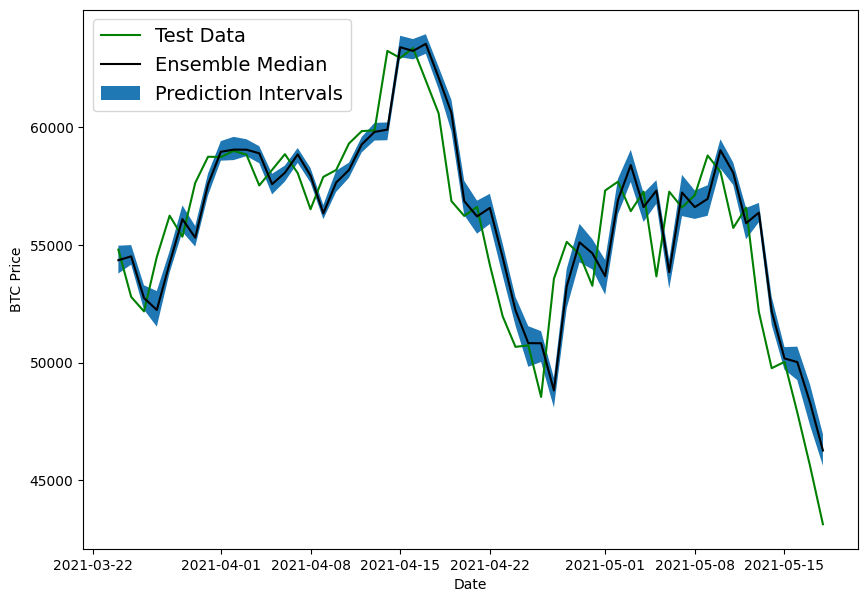

In [ ]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0) # median is more robust than mean

# Plot the medain of our ensemble preds
offset = 500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot upper and lower bounds, let's use fill_between: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill.html
plt.fill_between(X_test.index[offset:], (lower)[offset:], (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14)
plt.show()


So far all of our models predictions have been lagging behind the test data...

As if they're relicating what the naive model does and just predict the previous timestep as the next timestamp.

> 🔑 **Note**: Our prediction intervals assume that the data we're using come from a Gaussian/normal distribution (also called a bell curve), however, open systems rarely follow the Gaussian. We'll see this later on with the turkey problem 🦃. For further reading on this topic, I'd recommend reading The Black Swan by Nassim Nicholas Taleb, especially Part 2 and Chapter 15.

## Aside: two types of uncertainty (cocconut and subway)

Uncertainity estimates in machine learning seek out to qualitatively and quantitatively answer the questions:
1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. What doesn't my model know? (what can a model never predict? Or would it helpful if a model could tell you that when it's making a prediction, it doesn't actually know if it's right or not).

There are two major types of uncertainity you should know about:
* **Aleatoric uncertainty** -  this type of uncertainity cannot be reduced and it's often referred as data uncertainity or subway uncertainity
* **Epistemic uncertainty** - this type of uncertainity can be reduced, it's also referred to as "model" or "coconut" uncertainity

## Model 9: Train a model on the full historical data to make predictions into the future

So far all of our models have predicted on the test dataset, however, this is oly a pseudofuture.

Let's now build a model which is capable of predicting into the future!

In [ ]:
bitcon_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Train model on entire data to make predictions for the next day
X_all = bitcon_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels
y_all = bitcon_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [ ]:
X_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [ ]:
# Turn data into efficient running tensors
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimal performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_9_future_model.keras")

# Compile
model_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)
#

### Make predictions into future

In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14

To make predictions into the future we want a function which:

1. Takes as input:
  * a list of values (Bitcoin historical data)
  * a trained model (such as `model_9`)
  * a window into the future to predict (our `INTO_FUTURE` variable)
  * the window size a model trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on)
2. Creates an empty list for future forecasts this will be returened at the end of the end, when it's full of predict and exracts the last `WINDOW_SIZE` values from the input values
3. Loop `INTO_FUTURE`times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction

In [ ]:
y_all[-WINDOW_SIZE:] # the last window size

array([56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361, 43144.47129086])

In [ ]:
# 1. Create function to make prediction into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into future steps after value ends.

  Returns future forecasts as a list of floats.
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each
  for _ in range(INTO_FUTURE):
   # Predict on last window the append it again, again and again (our model will eventually start to make forecast on its own forecast)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Prediction on: \n{last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window win new pred and get WINDOW_SIZE most recent preds
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  return future_forecast

> 🛠 **Exercise**: In terms of a forecasting model, what might another approach to our make_future_forecasts() function? Recall, that for making forecasts, you need to retrain a model each time you want to generate a new prediction.

> So perhaps you could try to: make a prediction (one timestep into the future), retrain a model with this new prediction appended to the data, make a prediction, append the prediction, retrain a model... etc.

> As it is, the make_future_forecasts() function skips the retraining of a model part.

In [ ]:
# Make forecasts into the future
future_forecast = make_future_forecasts(values=y_all,
                                         model=model_9,
                                         into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction on: 
[56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55522.6015625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction on: 
[52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55522.6015625 ] -> Prediction: 52275.1796875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction on: 
[49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55522.6015625  52275.1796875 ] -> Prediction: 50880.66796875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Prediction on: 
[50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55522.6015625  52275.1796875  50880.66796875] -> Prediction: 49361.2890625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Prediction on: 
[47885.62525472 45604.61575361 43144.47129086 55522.6015625
 52275.1796875  50880.66796875 49361.2890625 ] -> Prediction: 45270.56640625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predic

### Plot future forecasts


In [ ]:
future_forecast

[np.float32(55522.6),
 np.float32(52275.18),
 np.float32(50880.668),
 np.float32(49361.29),
 np.float32(45270.566),
 np.float32(45602.336),
 np.float32(47727.957),
 np.float32(55539.156),
 np.float32(53148.188),
 np.float32(50474.805),
 np.float32(47328.45),
 np.float32(44089.277),
 np.float32(46921.06),
 np.float32(51341.555)]

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date + into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for date
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [ ]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
# Insert last timestep/final price into next time steps so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55522.6  , 52275.18 , 50880.668, 49361.29 , 45270.566,
        45602.336, 47727.957, 55539.156, 53148.188, 50474.805, 47328.45 ,
        44089.277, 46921.06 , 51341.555], dtype=float32))

In [ ]:
next_time_steps.shape, future_forecast.shape

((15,), (15,))

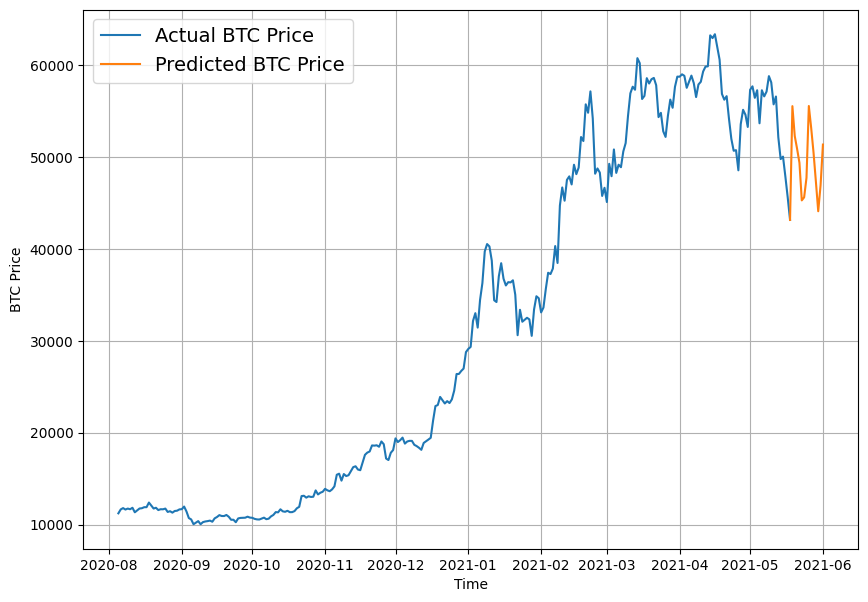

In [ ]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format='-', label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format='-', label="Predicted BTC Price")

## Model 10: Why forecasting is BS (the turkey problem 🦃)

In [ ]:
# Let's introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1]= btc_price_turkey[-1]/100

In [ ]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

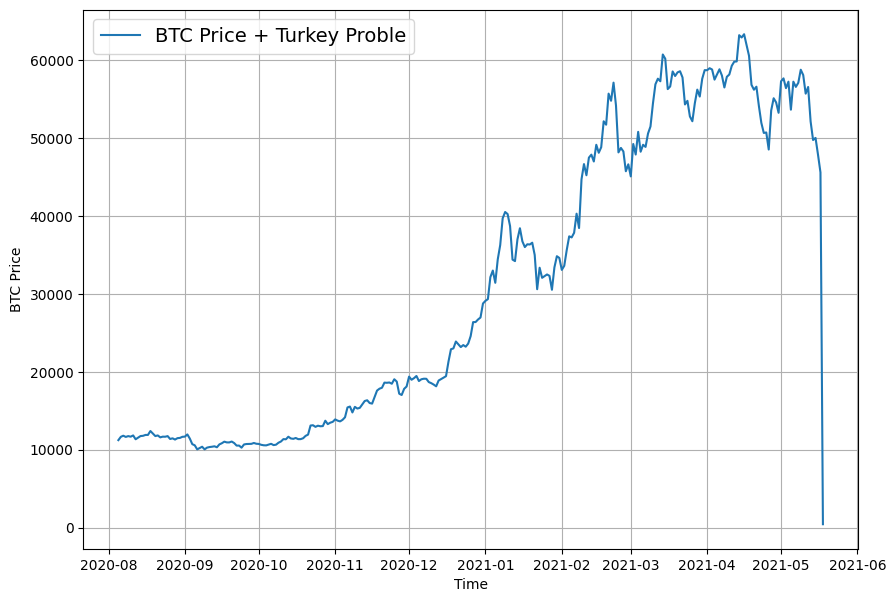

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format='-',
                 label="BTC Price + Turkey Proble",
                 start=2500)

In [ ]:
WINDOW_SIZE=7
HORIZON=1

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey),
                                         window_size=WINDOW_SIZE,
                                         horizon=HORIZON)
X_train, X_test, y_train, y_test = train_test_split(full_windows,
                                                    full_labels,
                                                    test_size=0.2,
                                                    shuffle=False)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

### Build a turkey model (model to predict on turkey data)

In [ ]:
# Clone model 1 architecture and fit the turkey model on the turkey data
turkey_model=tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model.keras"
turkey_model.compile(loss="mae",
                     optimizer = tf.keras.optimizers.Adam())
turkey_model.fit(X_train,
                 y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(model_name=turkey_model._name)])

#

In [ ]:
# Evaluate turkey model on test data
turkey_model.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 290.9007


649.2221069335938

In [ ]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model.keras")
turkey_model.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 289.5973


639.9443969726562

In [ ]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8857.94 , 8805.621, 9062.232, 8793.045, 8770.506, 8748.086,
       8699.238, 8540.732, 8475.785, 8550.168], dtype=float32)>

In [ ]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test, y_pred=turkey_preds)
turkey_results


 dtype of mae_naive_no_season: <dtype: 'float32'>


{'mae': np.float32(639.94446),
 'mse': np.float32(4897725.5),
 'rmse': np.float32(2213.0806),
 'mape': np.float32(21.573868),
 'mase': np.float32(0.9903161)}

In [ ]:
model_1_results

{'mae': np.float32(564.843),
 'mse': np.float32(1156788.1),
 'rmse': np.float32(1075.5409),
 'mape': np.float32(2.5356479),
 'mase': np.float32(0.99227273)}

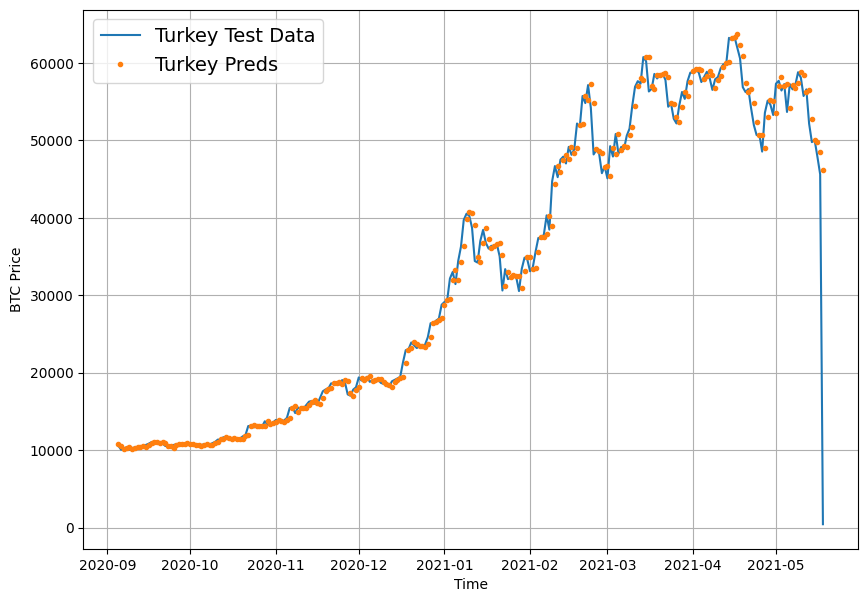

In [ ]:
plt.figure(figsize=(10,7))
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format='-',
                 label="Turkey Test Data",
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

## Compare Models

In [ ]:
# Compare different model results (w= window, h=horizon)
model_results = pd.DataFrame({"naive_model": naive_results,
                             "model_1_dense_w7_h1": model_1_results,
                             "model_2_dense_w30_h1": model_2_results,
                             "model_3_dense_w30_h7": model_3_results,
                             "model_4_CONV1D": model_4_results,
                             "model_5_LSTM": model_5_results,
                             "model_6_multivariate": model_6_results,
                             "model_7_NBEATS": model_7_results,
                             "model_8_ensemble": ensemble_results,
                             "model_10_turkey": turkey_results}).T

model_results[:10]

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,564.843018,1.156788e+06,1075.540894,2.535648,0.992273
model_2_dense_w30_h1,618.990356,1.290282e+06,1135.905640,2.919586,1.082001
model_3_dense_w30_h7,631.484253,1.321507e+06,1149.568115,2.946239,1.150181
model_4_CONV1D,17004.935547,5.091807e+08,22565.033203,84.599068,29.872961
model_5_LSTM,681.775330,1.599950e+06,1264.891357,3.099381,1.197690
model_6_multivariate,569.299377,1.167729e+06,1080.615234,2.550836,1.000101
model_7_NBEATS,577.249695,1.194298e+06,1092.839233,2.614445,1.014068
model_8_ensemble,576.804871,1.170148e+06,1081.733643,2.633046,1.013286
model_10_turkey,639.944458,4.897726e+06,2213.080566,21.573868,0.990316


<Axes: >

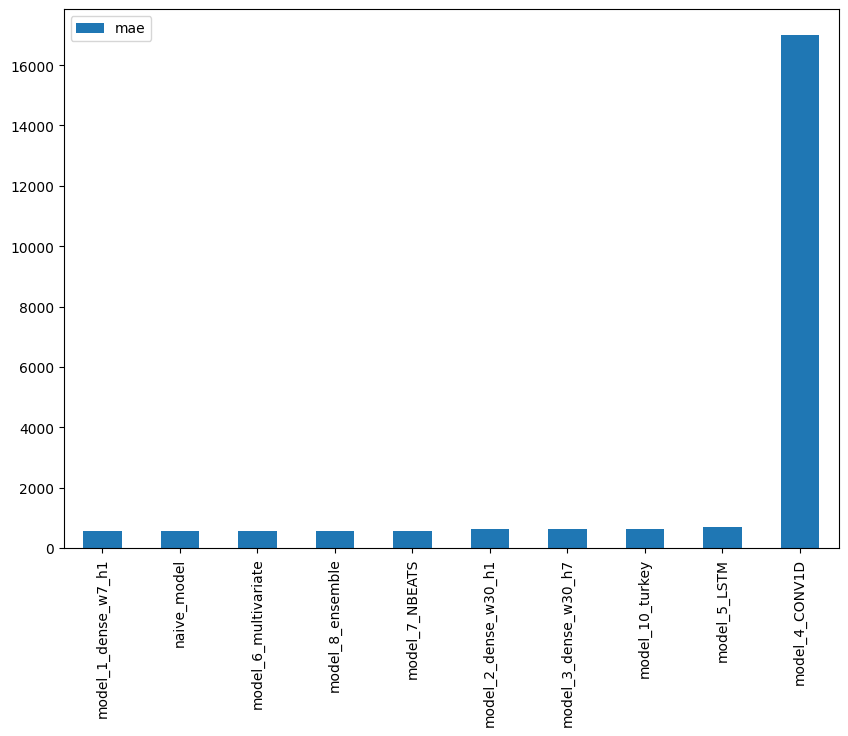

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10,7), kind="bar")